In [1]:
import sys
sys.path.append('../loader')

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from utils.xdecode import XDecode

In [3]:
root = '../SimpleDataset/X.h5' # https://github.com/DatasetLab/SimpleDataset
# 载入数据集 X
X = XDecode(root)

## 获取 'mnist', 'fashion_mnist', 'cifar10' 的标签名称

In [4]:
X.get_label_names('mnist') # 获取 'mnist' 标签名称

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
X.get_label_names('fashion_mnist') # 获取 'fashion_mnist' 标签名称

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
X.get_label_names('cifar10') # 获取 'cifar10'标签名称

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

## 获取 'cifar100' 的标签名称

In [7]:
X.get_coarse_label_names()   # 获得 'cifar100' 的粗标签

array(['aquatic_mammals', 'fish', 'flowers', 'food_containers',
       'fruit_and_vegetables', 'household_electrical_devices',
       'household_furniture', 'insects', 'large_carnivores',
       'large_man-made_outdoor_things', 'large_natural_outdoor_scenes',
       'large_omnivores_and_herbivores', 'medium_mammals',
       'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals',
       'trees', 'vehicles_1', 'vehicles_2'], dtype='<U30')

In [8]:
X.get_fine_label_names()   # 获得 'cifar100' 的细标签

array(['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee',
       'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus',
       'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
       'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch',
       'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant',
       'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
       'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
       'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
       'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter',
       'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate',
       'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road',
       'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
       'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar',
       'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
       't

下面介绍数值型数据，因为训练集与测试集是一致的，所以仅仅展示测试集。

## 获取 'mnist', 'fashion_mnist', 'cifar10' 的数值标签

In [9]:
X.get_testY('mnist')[:]  # 'mnist' 的数值标签

array([7, 2, 1, ..., 4, 5, 6])

In [10]:
X.get_testY('fashion_mnist')[:]  # 'fashion_mnist' 的数值标签

array([9, 2, 1, ..., 8, 1, 5])

In [11]:
X.get_testY('cifar10')[:]  # 'cifar10' 的数值标签

array([3, 8, 8, ..., 5, 1, 7])

## 获取 'cifar100' 的数值标签

In [12]:
X.get_test_coarse_labels()[:]  # 'cifar100'  的数值粗标签

array([10, 10,  0, ...,  4,  8,  2])

In [13]:
X.get_test_fine_labels()[:]  # 'cifar100'  的数值细标签

array([49, 33, 72, ..., 51, 42, 70])

## 获取数据的图片数组

In [14]:
X.get_testX('mnist')[0].shape # 取一张'mnist'图片并返回 shape

(28, 28)

In [15]:
X.get_testX('fashion_mnist')

/fashion_mnist/testX (Array(10000, 28, 28)) ''
  atom := UInt8Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'irrelevant'
  chunkshape := None

In [16]:
X.get_testX('cifar10')[0].shape # 取一张'cifar10'图片并返回 shape

(32, 32, 3)

## 画出多张图片并显示标签名称

In [17]:
def show_imgs(imgs, labels, row_num):
    '''展示 多张图片，并显示图片标签
    '''
    n = imgs.shape[0]
    assert n % row_num==0, "请输入可以整除图片数量的行数"
    h, w = row_num, int(n / row_num)
    fig, ax = plt.subplots(h, w, figsize=(7, 7))
    K = np.arange(n).reshape((h, w))
    names = labels.reshape((h, w))
    for i in range(h):
        for j in range(w):
            img = imgs[K[i, j]]
            ax[i][j].imshow(img)
            ax[i][j].axes.get_yaxis().set_visible(False)
            ax[i][j].axes.set_xlabel(names[i][j])
            ax[i][j].set_xticks([])
    plt.show()

### 展示 mnist 部分图片

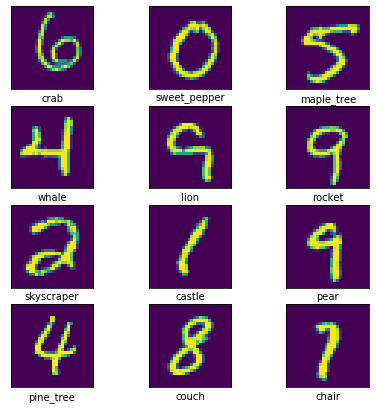

In [18]:
name = 'mnist'
select_image_id = slice(100,112)
imgs = X.get_testX(name)[select_image_id]
label_names = X.get_fine_label_names()
labels = X.get_test_fine_labels()[select_image_id]  # 获得标签的数值代表
labels = np.array([label_names[ind] for ind in labels])
row_num = 4
show_imgs(imgs, labels, row_num)

### 展示 fashion-mnist 部分图片

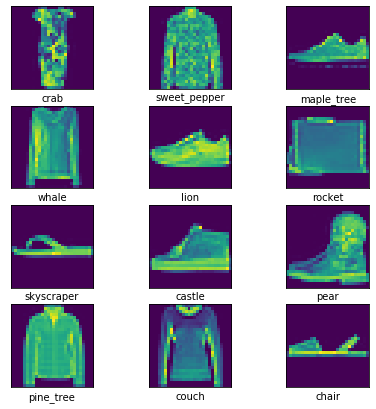

In [19]:
name = 'fashion_mnist'
select_image_id = slice(100,112)
imgs = X.get_testX(name)[select_image_id]
label_names = X.get_fine_label_names()
labels = X.get_test_fine_labels()[select_image_id]  # 获得标签的数值代表
labels = np.array([label_names[ind] for ind in labels])
row_num = 4
show_imgs(imgs, labels, row_num)

### 展示 Cifar10 部分图片

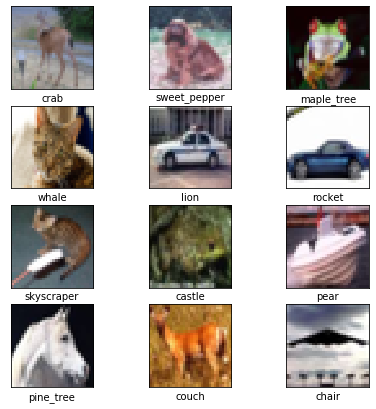

In [20]:
name = 'cifar10'
select_image_id = slice(100,112)
imgs = X.get_testX(name)[select_image_id]
label_names = X.get_fine_label_names()
labels = X.get_test_fine_labels()[select_image_id]  # 获得标签的数值代表
labels = np.array([label_names[ind] for ind in labels])
row_num = 4
show_imgs(imgs, labels, row_num)

### 展示 Cifar100 部分图片

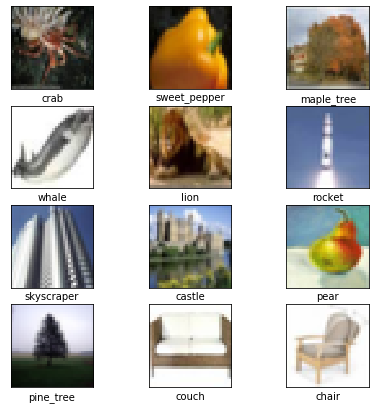

In [21]:
name = 'cifar100'
select_image_id = slice(100,112)
imgs = X.get_testX(name)[select_image_id]
label_names = X.get_fine_label_names()
labels = X.get_test_fine_labels()[select_image_id]  # 获得标签的数值代表
labels = np.array([label_names[ind] for ind in labels])
row_num = 4
show_imgs(imgs, labels, row_num)